 ### Диплом

In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('HR.csv')
# для включения уровня зарплаты в рассчеты приведем к числовому значению
data.salary = data.salary.map({'low': 1, 'medium': 2, 'high': 3})
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


### Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [4]:
data.describe()
# 50 перцентиль - медиана выборки 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
data.mode() # вторая строка отображается, так как в колонке avarage_monthly_hours нет уникальной моды

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,1.0
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# у колонки department строковые значения - посмотрим на их количества 
data.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

###  Рассчитать и визуализировать корреляционную матрицу для переменных.

In [7]:
corr_data = data.corr()
corr_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


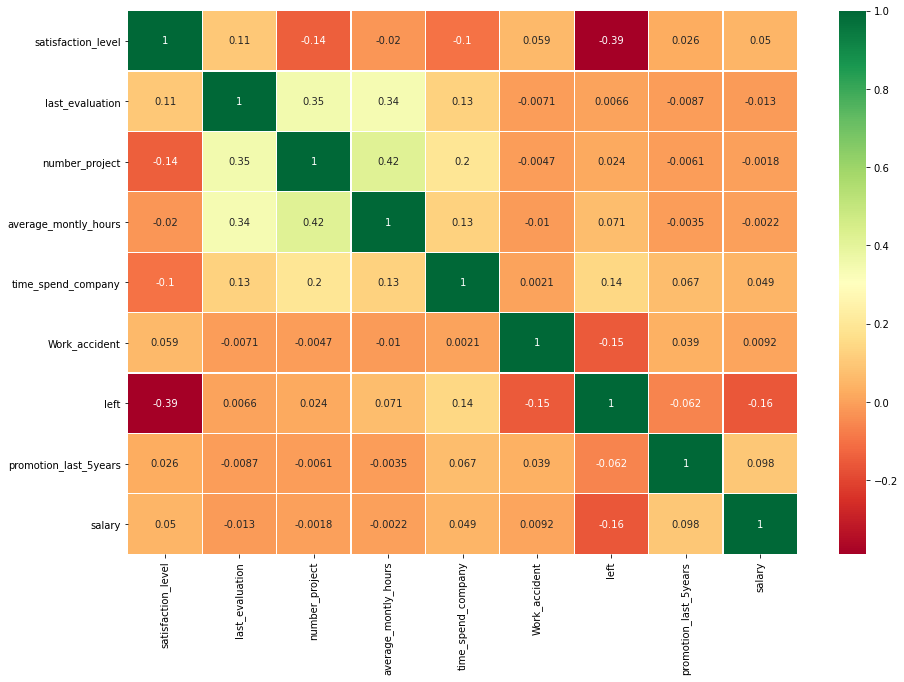

In [8]:
sns.heatmap(corr_data, annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

Два наиболее зависимых друг от друга параметра - number_project и average_monthly_hours 
Можем предположить, что количество отработанных часов сотрудника прямо пропорционально количеству проектов у него (что вполне логично) 

Так же сильная обратная зависимость между параметрами satisfaction_level и left
То есть можем предположить что уволняются наименее удовлетворенные сотрудники 

Наименее связанные между собой параметры - work_accident и time_spent_company


### Рассчитайте сколько сотрудников работает в каждом департаменте

In [9]:
# учитываем только работающих на данный момент сотрудников - 
# в задании сказано "работает" в настоящем времени
data.loc[data.left == 0].department.value_counts().reset_index()

,index,department
0,sales,3126
1,technical,2023
2,support,1674
3,IT,954
4,product_mng,704
5,RandD,666
6,marketing,655
7,accounting,563
8,management,539
9,hr,524


### Показать распределение сотрудников по зарплатам.

<AxesSubplot:ylabel='salary'>

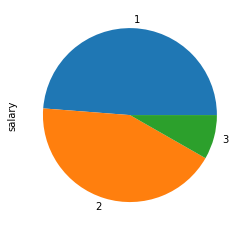

In [10]:
data.salary.value_counts().plot(kind='pie')

Для наших данных отлично подходит график pie - отчетливо видим распределение зарплат - примерно у 10% зарплата высокая, низкая - у половины и у оставшихся - средняя

### Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

<AxesSubplot:xlabel='department', ylabel='count'>

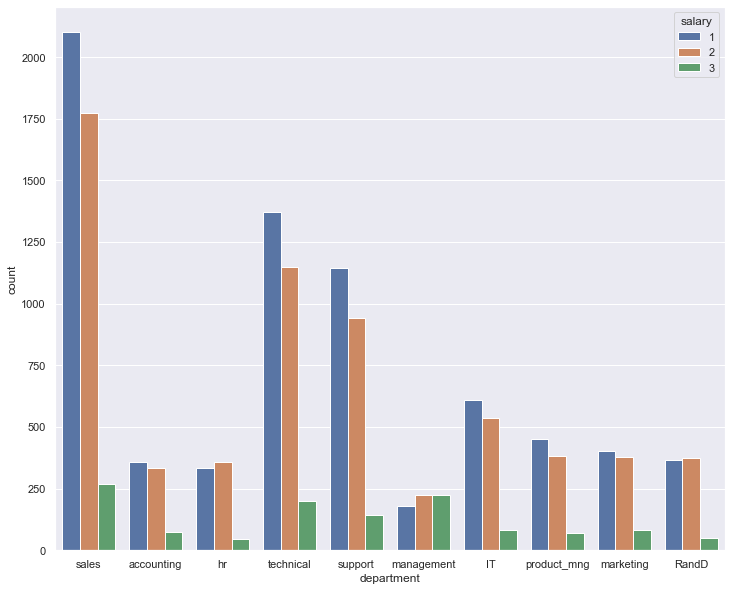

In [11]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.countplot(x = 'department', hue = 'salary', data = data)

### Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

H0 гипотеза (отличий нет): Сотрудники с высокими и низким окладом работают одинковое количество часов

H1 (есть статистически значимые отличия): Сотрудники с высокими и низким окладом работают разное количество часов

In [12]:
alpha = 0.05
# создаем выборки 
low_salary = data.loc[data.salary == 1].average_montly_hours
high_salary = data.loc[data.salary == 3].average_montly_hours

In [13]:
stat, pvalue = stats.ttest_ind(high_salary, low_salary, equal_var=False)
if (pvalue < alpha):
    print('Нулевая гипотеза верна')
    if stat > 0:
        print('Сотрудники с высокой зарплатой проводят на работе больше времени, чем сотрудники с низкой')
    else:
        print('Сотрудники с низкой зарплатой проводят на работе больше времени, чем сотрудники с высокой')
else:
    print('Статистически значимой разницы между количеством отработанных часов у сотрудников нет')

Статистически значимой разницы между количеством отработанных часов у сотрудников нет


### Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

In [14]:
left, stand = data.loc[data.left == 1], data.loc[data.left == 0]

###### 1. Доля сотрудников с повышением за последние 5 лет

In [15]:
left_promo = left.promotion_last_5years.value_counts(normalize=True)
left_promo = pd.concat([left_promo], axis=1)
f"Доля получивших повышение сотрудников среди уволившихся: {round(left_promo.promotion_last_5years[1], 3)*100}%"

'Доля получивших повышение сотрудников среди уволившихся: 0.5%'

In [16]:
stand_promo = stand.promotion_last_5years.value_counts(normalize=True)
stand_promo = pd.concat([stand_promo], axis=1)
f"Доля получивших повышение сотрудников среди оставшихся: {round(stand_promo.promotion_last_5years[1], 3)*100}%"

'Доля получивших повышение сотрудников среди оставшихся: 2.6%'

###### 2. Средняя степень удовлетворенности

In [17]:
print(f'Средняя степень удовлетворенности среди уволившихся: {round(left.satisfaction_level.mean(), 3)*100}%')
print(f'Средняя степень удовлетворенности среди оставшихся: {round(stand.satisfaction_level.mean(), 3)*100}%')

Средняя степень удовлетворенности среди уволившихся: 44.0%
Средняя степень удовлетворенности среди оставшихся: 66.7%


###### 3. Среднее количество проектов

In [18]:
print(f'Среднее количество проектов у уволившихся: {round(left.number_project.mean())}')
print(f'Среднее количество проектов у оставшихся: {round(stand.number_project.mean())}')

Среднее количество проектов у уволившихся: 4
Среднее количество проектов у оставшихся: 4


### Разделить данные на тестовую и обучающую выборки
### Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
### Оценить качество модели на тестовой выборке

In [19]:
# убираем лишние колонки
lda_data = data.drop(columns=['department', 'salary'])

In [20]:
# Делим данные на тестовую и тренировочную выборки
data_train, data_test = train_test_split(lda_data, test_size=0.2)

y_train, y_test = data_train.left, data_test.left
del data_train["left"]
del data_test["left"]

In [21]:
# создаем модель линейной регрессии
lda = LinearDiscriminantAnalysis()
lda.fit(data_train, y_train)
predict = lda.predict(data_test)

In [22]:
accuracy_score(y_test, predict)

0.7566666666666667

Точность модели всего 76% - она однозначно нуждается в доработке или данные нуждаются в более тщательной обработке 